In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import math
from module_python_12 import joint_plot_3d
from module_python_12 import joint_plot_cond_3d

In [2]:
df = pd.read_csv("dataset/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Analisa Descriptive Statistics

1. Berapa rata rata umur pada data tersebut?
2. Berapa rata rata nilai BMI dari yang merokok?
3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)
7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [3]:
# Berapa rata2 umur pada data tersebut?

print(f"rata-rata umur pada data tersebut adalah { df['age'].mean() }")

rata-rata umur pada data tersebut adalah 39.20702541106129


In [4]:
# Berapa rata-rata nilai BMI dari yang merokok?

print(f"nilai rata-rata BMI dari yang merokok adalah {df[df.smoker == 'yes']['bmi'].mean():.2f}")

nilai rata-rata BMI dari yang merokok adalah 30.71


In [5]:
df[df.smoker == 'yes']['bmi'].describe()

count    274.000000
mean      30.708449
std        6.318644
min       17.195000
25%       26.083750
50%       30.447500
75%       35.200000
max       52.580000
Name: bmi, dtype: float64

In [6]:
df[df.smoker == 'no']['bmi'].describe()

count    1064.000000
mean       30.651795
std         6.043111
min        15.960000
25%        26.315000
50%        30.352500
75%        34.430000
max        53.130000
Name: bmi, dtype: float64

Text(0, 0.5, 'BMI')

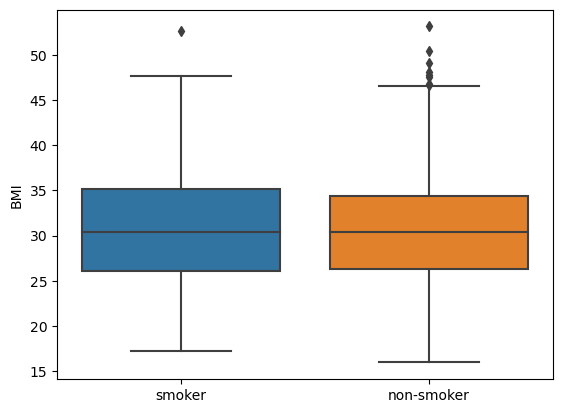

In [7]:
ax = sns.boxplot(data=[df[df.smoker == 'yes']['bmi'],df[df.smoker == 'no']['bmi']])
ax.set_xticklabels(["smoker","non-smoker"])
ax.set_ylabel('BMI')

In [8]:
# Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

df[df.smoker == 'yes']['charges'].var() == df[df.smoker == 'no']['charges'].var()

False

In [9]:
# Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

df[df.sex == 'male']['age'].mean() == df[df.sex == 'female']['age'].mean()

False

In [10]:
# Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?

df[df['smoker']=='yes']['charges'].mean()
# 32050.23183153285
df[df['smoker']=='no']['charges'].mean()
# 8434.268297856199

# lebih tinggi tagihan perokok

8434.268297856199

In [11]:
# Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMI nya di atas 25 atau non perokok yang BMI nya diatas 25

df[(df['smoker']=='yes') & (df['bmi']>25)]['charges'].mean()
# 35116.90965694065
df[(df['smoker']=='no') & (df['bmi']>25)]['charges'].mean()
# 8629.589609712148

8629.589609712148

In [12]:
# BMI mana yang lebih tinggi, seseorang perokok atau non perokok?
df[df['smoker']=='yes']['bmi'].mean()
# 30.708448905109503
df[df['smoker']=='no']['bmi'].mean()
# 30.651795112781922

30.651795112781922

#### Analisa Variabel Diskrit

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [13]:
# gender mana yang memiliki tagihan paling tinggi?
total_charges_male = df[df.sex == 'male']['charges'].sum()
total_charges_female = df[df.sex == 'female']['charges'].sum()

In [14]:
# Distribusi peluang tagihan di tiap-tiap region
total_charges = df['charges'].sum()
(((df.groupby('region')[['charges']].sum())/total_charges)*100).reset_index()

,region,charges
0,northeast,24.463344
1,northwest,22.728947
2,southeast,30.208057
3,southwest,22.599652


In [15]:
# Apakah setiap region memiliki proporsi data banyak orang yang sama?
df.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [16]:
# Mana yang lebih tinggi proporsi perokok atau non perokok?
df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

In [17]:
# Berapa peluang seseorang adalah perempuan
len(df[df.sex == 'female'])/len(df)

0.4947683109118087

In [18]:
# Berapa peluang seseorang adalah laki-laki
len(df[df.sex == 'male'])/len(df)

0.5052316890881914

In [19]:
# peluang seseorang adalah perempuan
p_perempuan = df.groupby('sex').size()['female']/df.groupby('sex').size().sum()
p_perempuan

0.4947683109118087

In [20]:
# peluang seseorang adalah laki-laki
p_laki = df.groupby('sex').size()['male']/df.groupby('sex').size().sum()
p_laki

0.5052316890881914

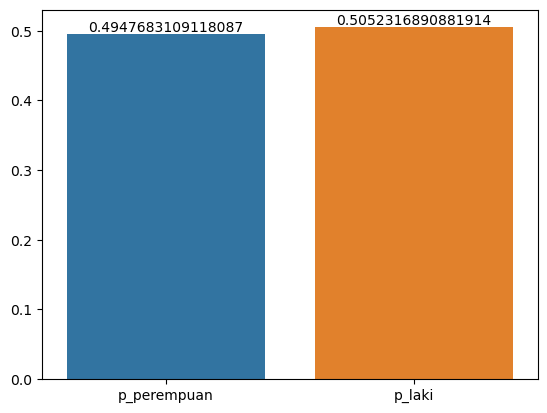

In [21]:
x_values = ['p_perempuan','p_laki']
y_values = [p_perempuan,p_laki]

sns.barplot(x=x_values,y=y_values)
for i in range(len(x_values)):
    plt.annotate(str(y_values[i]), xy=(i, y_values[i]), ha='center', va='bottom')

In [22]:
# Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
p_perempuan_perokok = df[df.smoker == 'yes'].groupby('sex').size()['female']/df[df.smoker == 'yes'].groupby('sex').size().sum()
p_perempuan_perokok

0.4197080291970803

In [23]:
# Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
p_laki_perokok = df[df.smoker == 'yes'].groupby('sex').size()['male']/df[df.smoker == 'yes'].groupby('sex').size().sum()
p_laki_perokok

0.5802919708029197

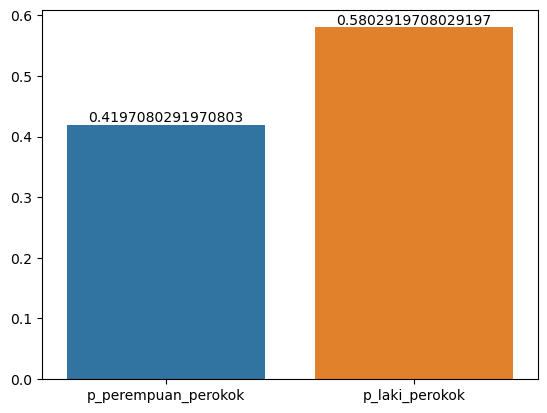

In [24]:
x_values = ['p_perempuan_perokok','p_laki_perokok']
y_values = [p_perempuan_perokok,p_laki_perokok]

sns.barplot(x=x_values,y=y_values)
for i in range(len(x_values)):
    plt.annotate(str(y_values[i]), xy=(i, y_values[i]), ha='center', va='bottom')

<AxesSubplot:xlabel='region', ylabel='charges'>

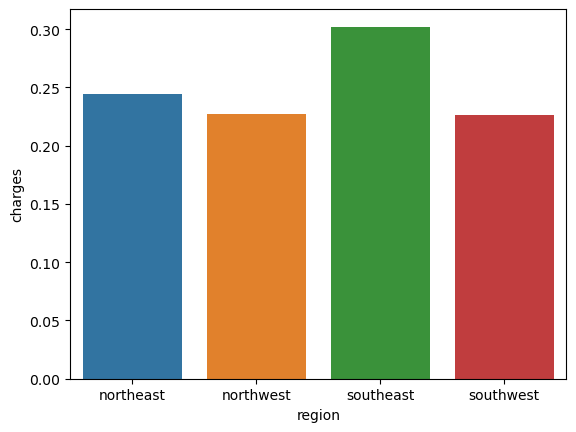

In [25]:
# Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

proporsi_tagihan_region = (df.groupby('region')[['charges']].sum())/total_charges
sns.barplot(x = 'region', y = 'charges', data = proporsi_tagihan_region.reset_index())

#### Analisa Varibel Kontinyu

1. Mana yang lebih mungkin terjadi
        a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
        atau
        b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi
        a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
        b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
        diatas 16.7k

In [26]:
# Mana yang lebih mungkin terjadi
# a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau 
# b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
# buat fungsi nilai tagihan berbanding dengan nilai BMI

In [27]:
df.charges.mean()

13270.422265141257

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

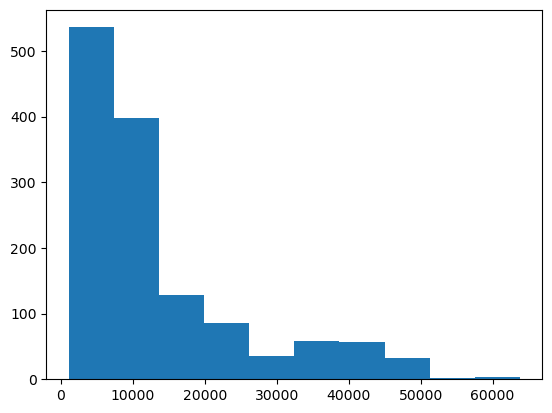

In [28]:
plt.hist(df['charges'],bins=10)

<AxesSubplot:xlabel='charges', ylabel='Density'>

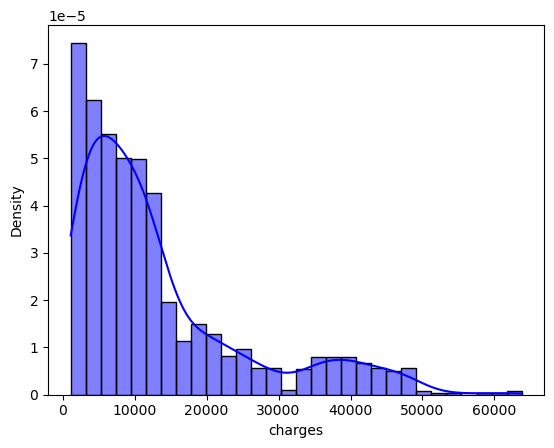

In [29]:
sns.histplot(data=df, x="charges", kde=True, stat="density", color="blue")

(array([  9.,  15.,  28.,  43.,  62.,  84.,  99., 118., 116., 136., 122.,
        113.,  89.,  87.,  72.,  45.,  37.,  25.,  12.,   9.,   8.,   5.,
          1.,   1.,   2.]),
 array([15.96  , 17.4468, 18.9336, 20.4204, 21.9072, 23.394 , 24.8808,
        26.3676, 27.8544, 29.3412, 30.828 , 32.3148, 33.8016, 35.2884,
        36.7752, 38.262 , 39.7488, 41.2356, 42.7224, 44.2092, 45.696 ,
        47.1828, 48.6696, 50.1564, 51.6432, 53.13  ]),
 <BarContainer object of 25 artists>)

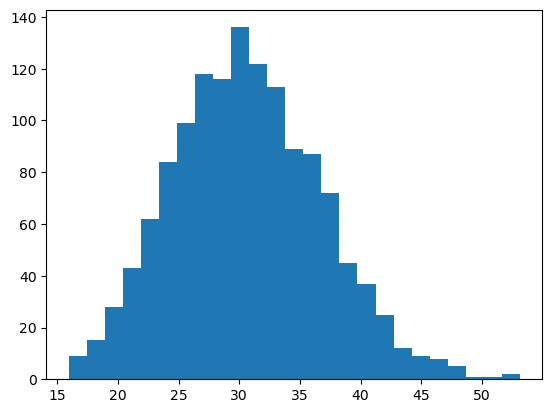

In [30]:
plt.hist(df['bmi'],bins=25)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

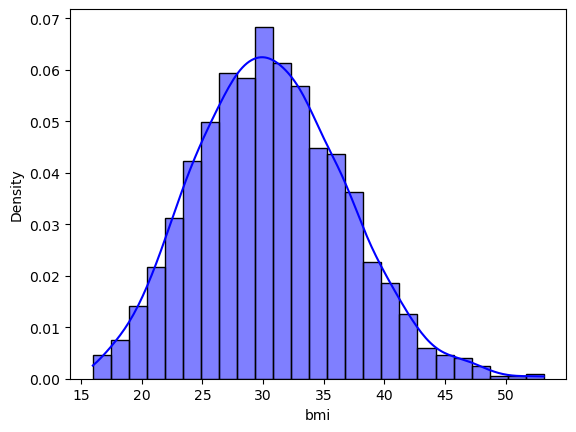

In [31]:
sns.histplot(data=df, x="bmi", kde=True, stat="density", color="blue")

In [32]:
df['bmi'].mean()

30.663396860986538

In [33]:
df['bmi'].std()

6.098186911679017

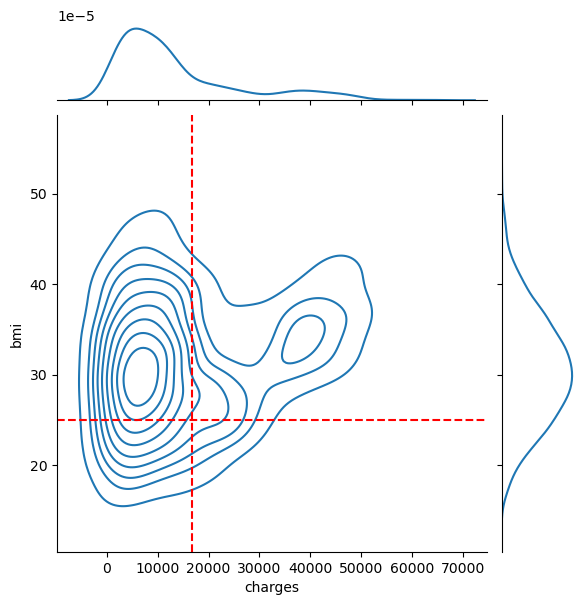

In [34]:
plot = sns.jointplot(data=df,x='charges',y='bmi',kind='kde')
plot.ax_joint.axvline(x=16_700,linestyle='--',c='red')
plot.ax_joint.axhline(y=25,linestyle='--',c='red')

-5142.981511 70035.283421 12.243 56.847


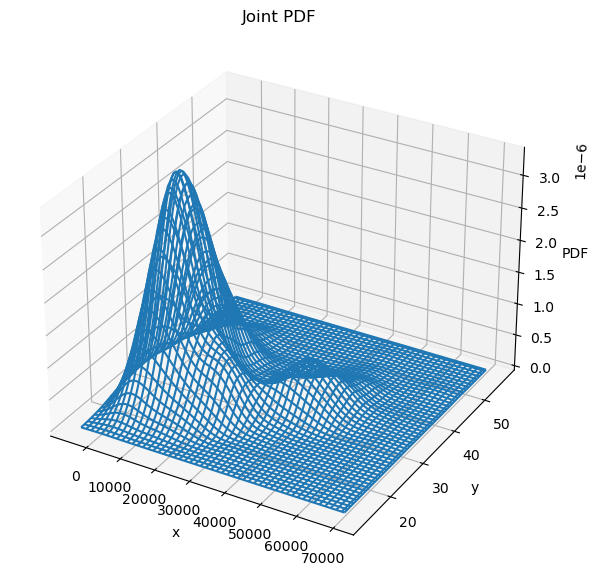

In [35]:
joint_plot_3d(x = df["charges"], y = df["bmi"])

In [36]:
condition = df['charges'] > 16_700
cond_charges = df[condition]['charges']
cond_bmi = df[condition]['bmi']

-5142.981511 70035.283421 12.243 56.847
12076.891654 68469.840406 14.2835 56.061499999999995


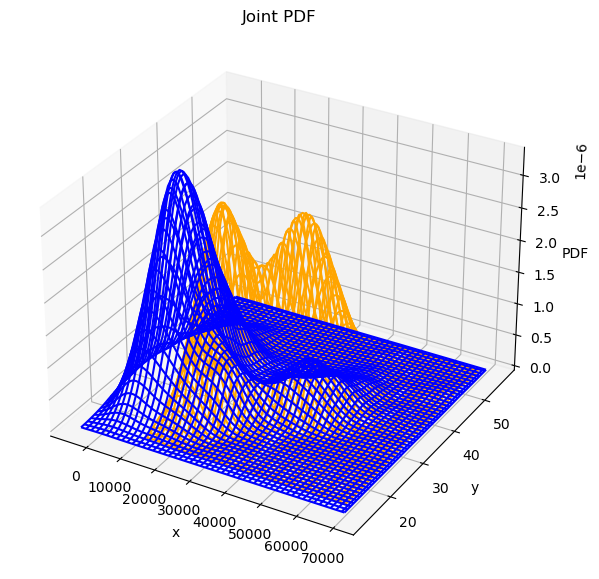

In [37]:
joint_plot_cond_3d(x = df["charges"], y = df["bmi"],x_cond = cond_charges, y_cond = cond_bmi)

In [38]:
condition1 = (df['charges'] > 16_700) & (df['bmi'] > 25)
condition2 = (df['charges'] > 16_700) & (df['bmi'] < 25)
cond1_charges = df[condition1]['charges']
cond1_bmi = df[condition1]['bmi']
cond2_charges = df[condition2]['charges']
cond2_bmi = df[condition2]['bmi']

-5142.981511 70035.283421 12.243 56.847
12099.010333000002 68467.82961700001 22.33 55.33


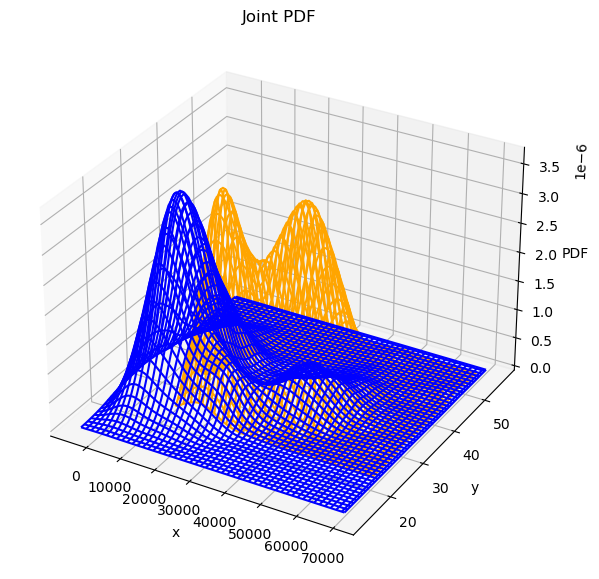

In [39]:
joint_plot_cond_3d(x = df["charges"], y = df["bmi"],x_cond = cond1_charges, y_cond = cond1_bmi)

-5142.981511 70035.283421 12.243 56.847
14946.997002999999 36898.681567 17.043 25.707


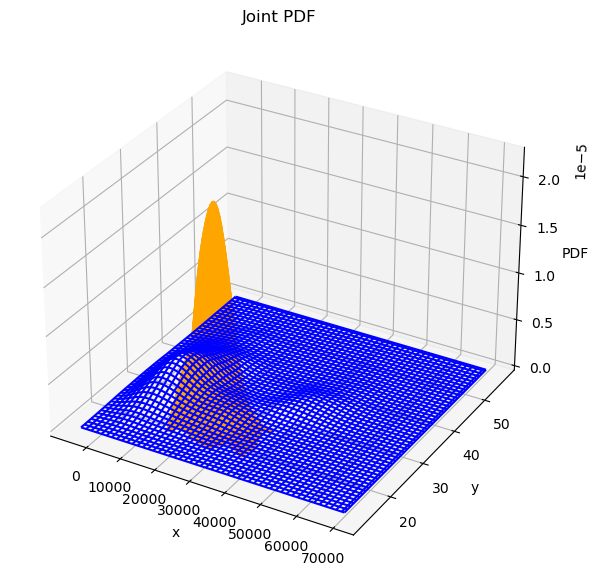

In [40]:
joint_plot_cond_3d(x = df["charges"], y = df["bmi"],x_cond = cond2_charges, y_cond = cond2_bmi)

In [41]:
#Mana yang lebih mungkin terjadi
        #a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
        #b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

#### Analisa Korelasi Variabel
Anda bisa memilih mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya,
misalnya dengan bmi dan variable tanggungan anak.

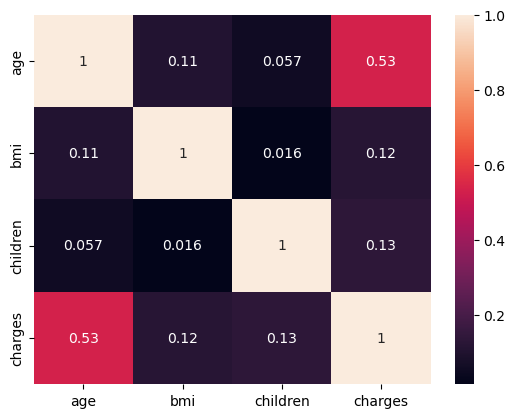

In [42]:
#df.corr(method='spearman')
sns.heatmap(df.corr(method='spearman'), annot = True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

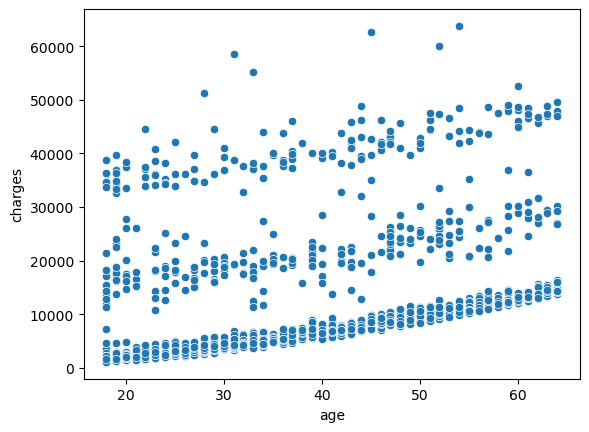

In [43]:
sns.scatterplot(data=df, x='age',y='charges')

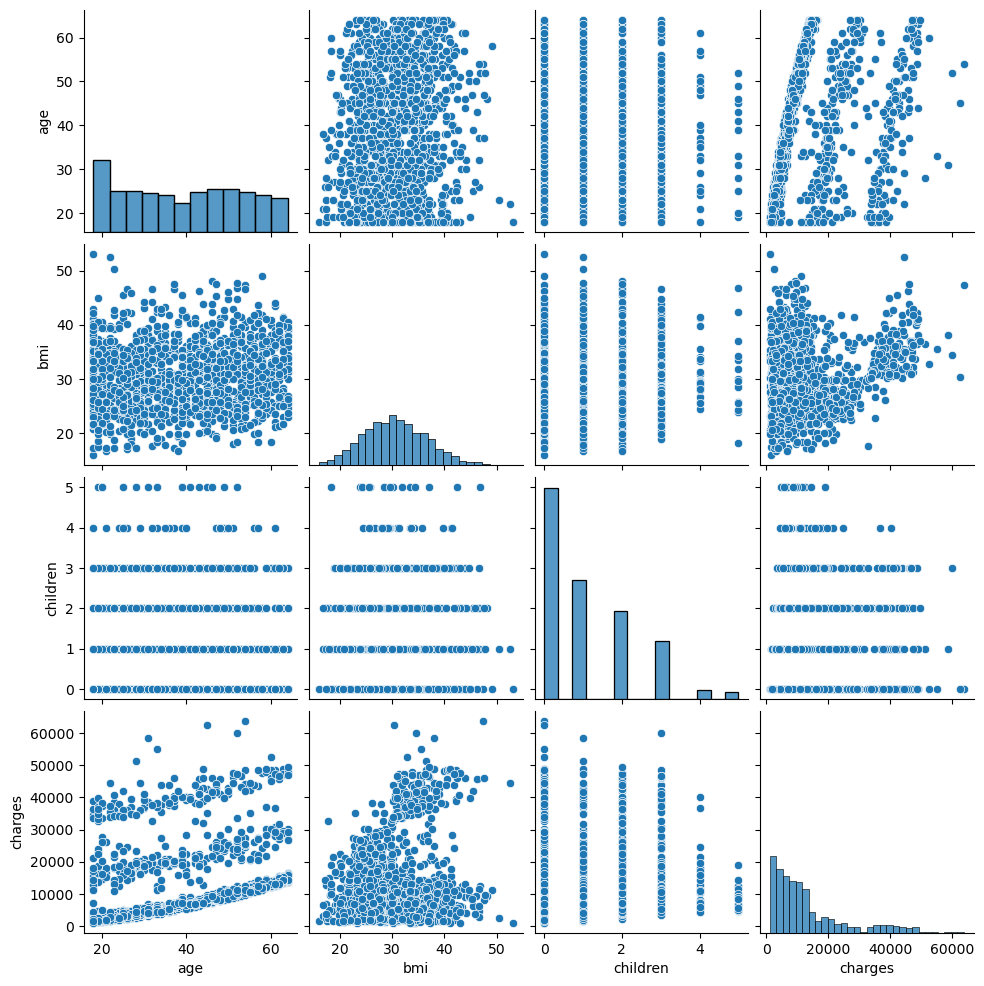

In [44]:
sns.pairplot(df)

#### Pengujian Hipotesis
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki laki lebih besar dari perempuan
3. Variansi tagihan kesehatan perokok dan non perokok sama
4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
5. Tagihan kesehatan laki-laki lebih besar dari perempuan

#### Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
h0 = miu charges perokok <= miu charges non perokok \
h1 = miu charges perokok > miu charges non perokok

In [45]:
tagihan_perokok = df[df['smoker']=='yes']['charges'].to_numpy()
tagihan_non_perokok = df[df['smoker']=='no']['charges'].to_numpy()

In [46]:
mean_tagihan_perokok = np.mean(tagihan_perokok)
mean_tagihan_non_perokok = np.mean(tagihan_non_perokok)
std_tagihan_perokok = np.std(tagihan_perokok, ddof=1)
std_tagihan_non_perokok = np.std(tagihan_non_perokok, ddof=1)

In [47]:
s_pooled = np.sqrt(((len(tagihan_perokok)-1)*std_tagihan_perokok**2 + (len(tagihan_non_perokok)-1)*std_tagihan_non_perokok**2) / (len(tagihan_perokok) + len(tagihan_non_perokok) - 2))

In [48]:
z_score = (mean_tagihan_perokok - mean_tagihan_non_perokok) / (s_pooled * np.sqrt(1/len(tagihan_perokok) + 1/len(tagihan_non_perokok)))

In [49]:
p_value = 2 * (1 - norm.cdf(abs(z_score)))

In [50]:
# Assume a significance level of 0.05
if p_value < 0.05:
    print("Reject null hypothesis. The means are different.")
else:
    print("Fail to reject null hypothesis. The means are the same.")

Reject null hypothesis. The means are different.


In [51]:
data_mean_tagihan_rokok = [mean_tagihan_perokok, mean_tagihan_non_perokok]
data_std_tagihan_rokok = [std_tagihan_perokok, std_tagihan_non_perokok]
label_tagihan_rokok = ['smoker','non-smoker']

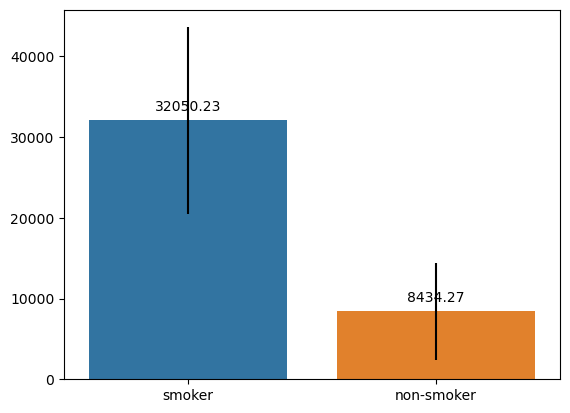

In [52]:
ax = sns.barplot(x=label_tagihan_rokok, y=data_mean_tagihan_rokok, yerr=data_std_tagihan_rokok, capsize=0.1)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

Text(0, 0.5, 'charges')

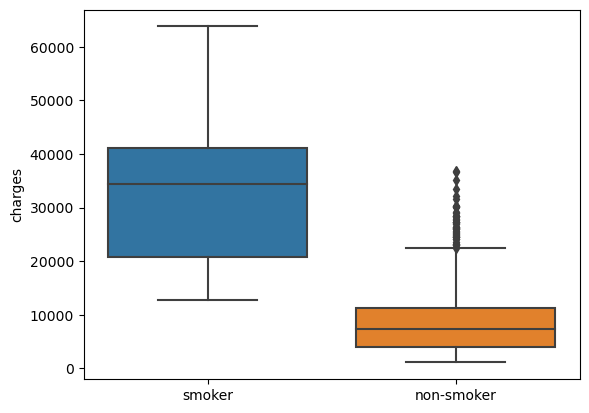

In [53]:
ax = sns.boxplot(data=[df[df.smoker == 'yes']['charges'],df[df.smoker == 'no']['charges']])
ax.set_xticklabels(["smoker","non-smoker"])
ax.set_ylabel('charges')

#### Proporsi perokok laki laki lebih besar dari perempuan
p_perokok_laki = jumlah perokok laki2/jumlah laki2 \
p_perokok_perempuan = jumlah perokok perempuan/jumlah perempuan

h0 = p_perokok_laki <= p_perokok_perempuan \
h1 = p_perokok_laki > p_perokok_perempuan

In [54]:
n_perokok_laki = len(df[(df['smoker']=='yes') & (df['sex']=='male')])
n_laki = len(df[df['sex']=='male'])
n_perokok_perempuan = len(df[(df['smoker']=='yes') & (df['sex']=='female')])
n_perempuan = len(df[df['sex']=='female'])
p_perokok_laki = n_perokok_laki/n_laki
p_perokok_perempuan = n_perokok_perempuan/n_perempuan

In [55]:
number_of_successes = np.array([n_perokok_laki, n_perokok_perempuan])
total_sample_sizes = np.array([n_laki,n_perempuan])

In [56]:
(z_score, p_value) = proportions_ztest(number_of_successes, total_sample_sizes,alternative='larger')
print("The computed Z test statistic is: ",z_score)
print("The p-value is: ", p_value)

The computed Z test statistic is:  2.7867402154855503
The p-value is:  0.002662057082160266


In [57]:
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.025)
print(z_crit)

1.959963984540054


In [58]:
if p_value<0.025:
    print("Reject the null hypothesis")
else:
    print("Accepting the Null hypothesis")

Reject the null hypothesis


kesimpulannya adalah bahwa lebih banyak perokok laki-laki dibandingkan perokok perempuan

#### Variansi tagihan kesehatan perokok dan non perokok sama


$$ H_0 : \sigma_{smoker}^2 = \sigma_{nonsmoker}^2$$
$$ H_a : \sigma_{smoker}^2  \neq \sigma_{nonsmoker}^2$$


In [59]:
smoker_charges_mean = df[df['smoker']=='yes']['charges'].mean()
non_smoker_charges_mean = df[df['smoker']=='no']['charges'].mean()

# Menentukan sample variance
smoker_charges_var = df[df['smoker']=='yes']['charges'].var() # 133'207'311.20634921
non_smoker_charges_var = df[df['smoker']=='no']['charges'].var() # 35'925'420.49611172

# Ukuran sampel dua kelompok
n_smoker = len(df[df['smoker']=='yes'])
n_nonsmoker = len(df[df['smoker']=='no'])

In [60]:
f_test = smoker_charges_var/non_smoker_charges_var
f_test

3.7078845387701587

In [61]:
f_crit=stats.f.ppf(1-0.05, n_smoker-1, n_nonsmoker-1)
print(f_crit)

1.1662297531965873


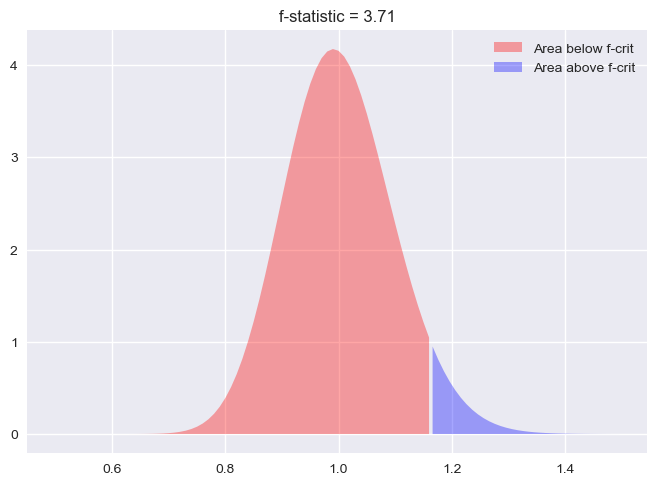

In [62]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(0.5,f_crit,0.01),
                 y1= stats.f.pdf(np.arange(0.5,f_crit,0.01), dfn=(n_smoker-1), dfd=(n_nonsmoker-1)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below f-crit'
                 )

plt.fill_between(x=np.arange(f_crit,1.5,0.01), 
                 y1= stats.f.pdf(np.arange(f_crit,1.5,0.01), dfn=(n_smoker-1), dfd=(n_nonsmoker-1)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above f-crit')
plt.legend()
plt.title (f'f-statistic = {f_test:0.2f}');

In [63]:
if f_test>f_crit:
    print("Tolak null hypothesis")
else:
    print("Terima null hypothesis")

Tolak null hypothesis


#### Tagihan kesehatan dengan BMI > 25 lebih tinggi daripada tagihan kesehatan dengan BMI < 25

h0 = mean_charges_bmi_above_25 <= mean_charges_bmi_below_25 \
h1 = mean_charges_bmi_above_25 > mean_charges_bmi_below_25

In [64]:
charges_bmi_above_25 = df[df['bmi']<25]['charges']
charges_bmi_below_25 = df[df['bmi']>25]['charges']

In [65]:
mean_charges_bmi_above_25 = charges_bmi_above_25.mean()
mean_charges_bmi_below_25 = charges_bmi_below_25.mean()

In [66]:
mean_charges_bmi_above_25

10282.224474367351

In [67]:
mean_charges_bmi_below_25

13946.47603532447

#### Tagihan kesehatan laki-laki lebih besar daripada perempuan

h0 = male_charges_mean <= female_charges_mean \
h1 = male_charges_mean > female_charges_mean

In [68]:
male_charges = df[df['sex']=='male']['charges']
female_charges = df[df['sex']=='female']['charges']
male_charges_mean = male_charges.mean()
female_charges_mean = female_charges.mean()

In [69]:
male_charges_mean

13956.751177721886

In [70]:
female_charges_mean

12569.57884383534